In [35]:
import pandas as pd
import matplotlib.pyplot as plt
# import pyspark.pandas as ps
import seaborn as sns

In [36]:
#biden = pd.read_csv("../data/csv/biden_submissions.csv")
#trump = pd.read_csv("../data/csv/trump_submissions.csv")
df = pd.read_csv("ml/df_ml.csv")

df

,Unnamed: 0,subreddit,author,text,num_comments,score,date,sentiment,is_biden,is_trump,id,is_hunter,is_border,is_war,is_israel,is_harris,is_indictment
0,0,Republican,interestingfactoid,say her name conservative group launches me...,2,12,2024-06-27,positive,1,0,1dpu59h,0,1,0,0,0,0
1,1,politics,Plastic-Age5205,biden expands window to try and keep millions ...,9,403,2024-03-29,negative,1,0,1bqxiww,0,0,0,0,0,0
2,2,Conservative,intelligentreviews,joe biden s mental incapacity is only half the...,5,49,2024-07-08,negative,1,0,1dy7ix1,0,0,0,0,0,0
3,3,Republican,yuri_2022,mccarthy goes viral for demolishing cnn report...,1,0,2023-06-13,negative,0,1,148flql,0,0,0,0,0,0
4,4,PoliticalDiscussion,bassmansrc,should biden resign which would guarantee an ...,34,0,2024-07-22,positive,1,0,1e9k8np,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107018,107018,Liberal,Walk1000Miles,trump allies are already working against the n...,11,53,2023-10-21,negative,0,1,17d34rj,0,0,0,0,0,0
107019,107019,politics,CBSnews,biden will be the democratic presidenti...,1,1,2023-09-21,positive,1,0,16onrxj,0,0,0,0,0,0
107020,107020,Conservative,intelligentreviews,six colorado voters file lawsuit to ban trump ...,0,1,2023-09-07,negative,0,1,16c1yu3,0,0,0,0,0,0
107021,107021,Conservative,f1sh98,hunter biden sues irs alleging agents released...,1,1,2023-09-18,negative,1,0,16luatx,1,0,0,0,0,0


In [37]:
biden = df[df['is_biden'] == 1]
trump = df[df['is_trump'] == 1]

In [38]:
avg_scores = biden.groupby('subreddit')['score'].mean().reset_index()
avg_scores = avg_scores.sort_values(by='score', ascending=False)

In [39]:
trump_counts = trump['subreddit'].value_counts().reset_index()
trump_counts.columns = ['subreddit', 'trump_mentions']

Biden_counts = biden['subreddit'].value_counts().reset_index()
Biden_counts.columns = ['subreddit', 'Biden_mentions']

mention_counts = (
    trump_counts
    .merge(Biden_counts, on='subreddit', how='outer')
    .fillna(0)
)

mention_counts = mention_counts.melt(
    id_vars='subreddit', 
    value_vars=['trump_mentions', 'Biden_mentions'],
    var_name='Category', 
    value_name='Mentions'
)


subreddits = ['Conservative', 'democrats', 'Republican', 'Libertarian', 'Liberal', 'politics']
mention_counts = mention_counts[mention_counts['subreddit'].isin(subreddits)]

df = df[df['subreddit'].isin(subreddits)]

biden = biden[biden['subreddit'].isin(subreddits)]
trump = trump[trump['subreddit'].isin(subreddits)]



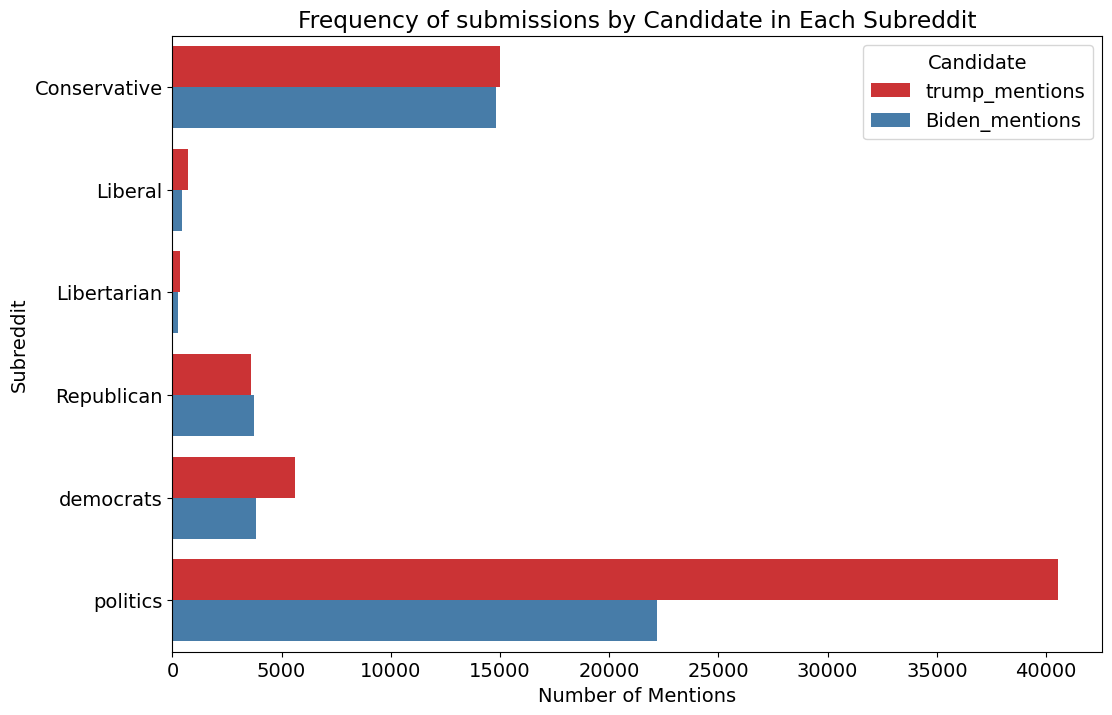

In [40]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(data=mention_counts, x='Mentions', y='subreddit', hue='Category', palette="Set1")
plt.title("Frequency of submissions by Candidate in Each Subreddit")
plt.xlabel("Number of Mentions")
plt.ylabel("Subreddit")
plt.legend(title="Candidate")
plt.savefig("../docs/plots/candidate_mentions.png", format="png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()


In [41]:
trump_avg_score = trump.groupby('subreddit')['score'].mean().reset_index()
trump_avg_score['Category'] = 'Trump'

Biden_avg_score = biden.groupby('subreddit')['score'].mean().reset_index()
Biden_avg_score['Category'] = 'Biden'

avg_scores = pd.concat([trump_avg_score, Biden_avg_score])

avg_scores = avg_scores[avg_scores['subreddit'].isin(subreddits)]


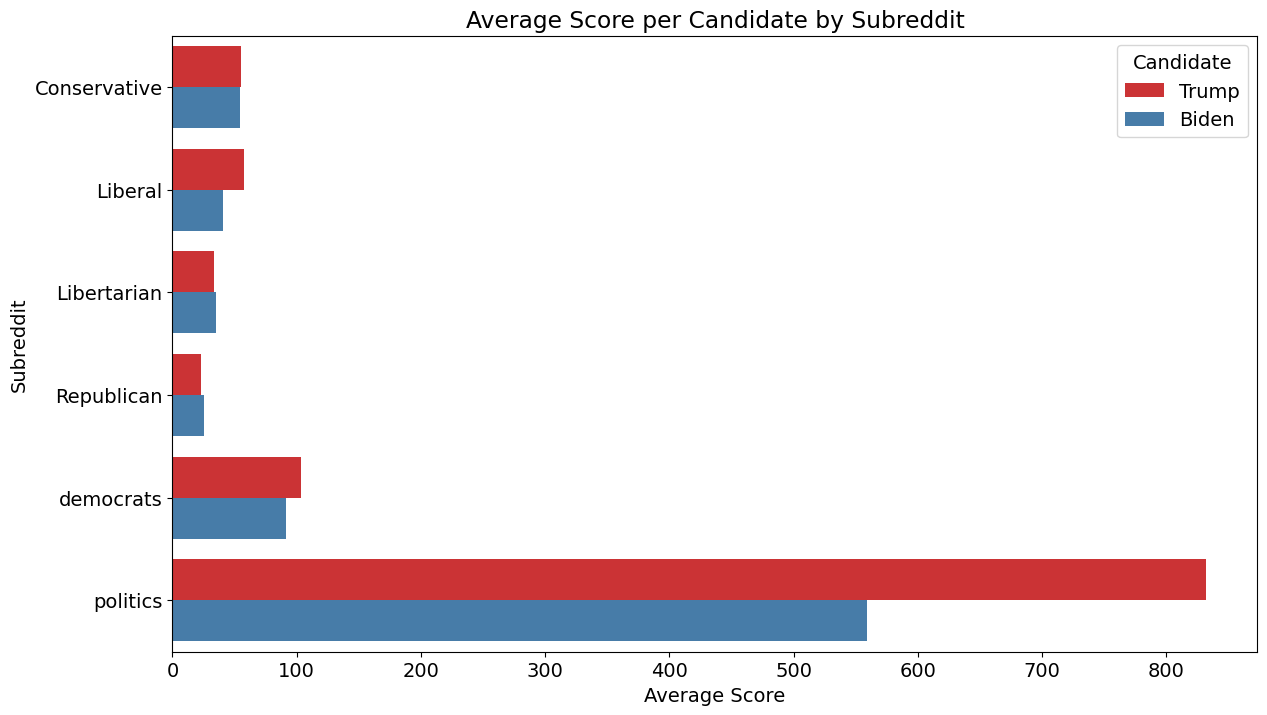

In [42]:
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_scores, x='score', y='subreddit', hue='Category', palette="Set1")
plt.title("Average Score per Candidate by Subreddit")
plt.xlabel("Average Score")
plt.ylabel("Subreddit")
plt.legend(title="Candidate")

plt.savefig("../docs/plots/candidate_score.png", format="png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [43]:
trump_avg_comments = trump['num_comments'].mean()
Biden_avg_comments = biden['num_comments'].mean()

avg_comments = pd.DataFrame({
    'Candidate': ['Trump', 'Biden'],
    'Average Comments': [trump_avg_comments, Biden_avg_comments]
})

/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_10275/100059129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_comments, x='Candidate', y='Average Comments', palette="Set1")


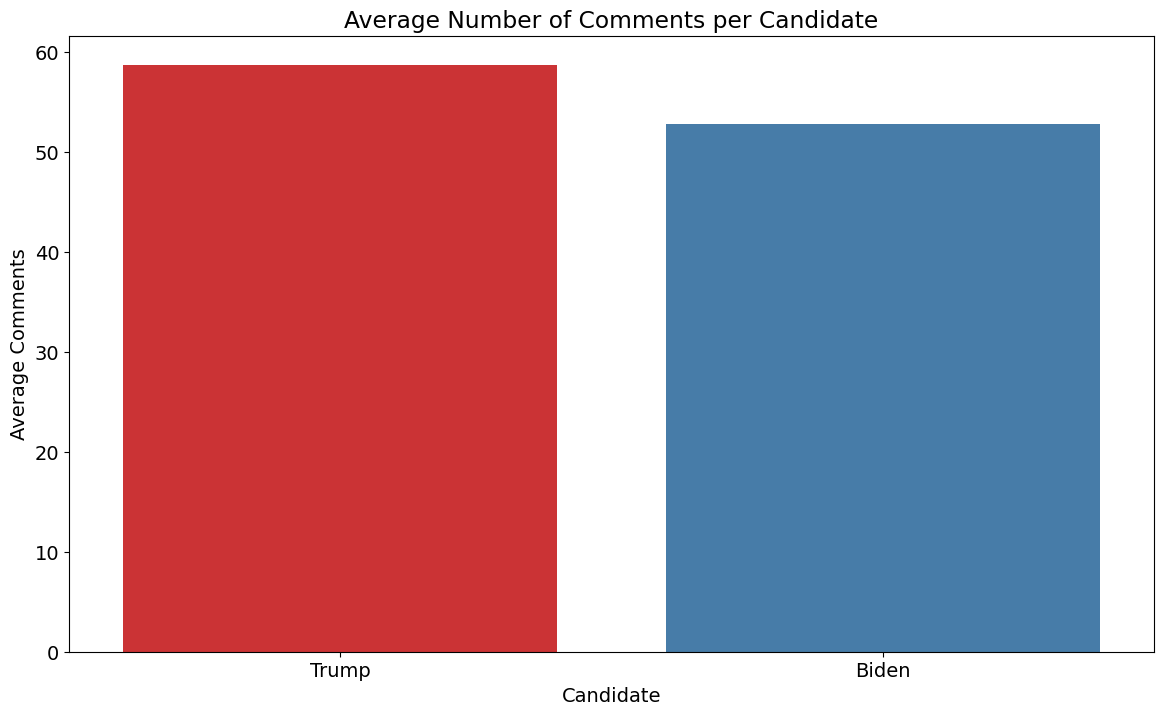

In [44]:
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_comments, x='Candidate', y='Average Comments', palette="Set1")
plt.title("Average Number of Comments per Candidate")
plt.xlabel("Candidate")
plt.ylabel("Average Comments")
plt.savefig("../docs/plots/avg_comments.png", format="png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [45]:
df["avg_comments"] = df.groupby('subreddit')['num_comments'].transform('mean')
df

/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_10275/1067589144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["avg_comments"] = df.groupby('subreddit')['num_comments'].transform('mean')


,Unnamed: 0,subreddit,author,text,num_comments,score,date,sentiment,is_biden,is_trump,id,is_hunter,is_border,is_war,is_israel,is_harris,is_indictment,avg_comments
0,0,Republican,interestingfactoid,say her name conservative group launches me...,2,12,2024-06-27,positive,1,0,1dpu59h,0,1,0,0,0,0,5.938036
1,1,politics,Plastic-Age5205,biden expands window to try and keep millions ...,9,403,2024-03-29,negative,1,0,1bqxiww,0,0,0,0,0,0,85.078779
2,2,Conservative,intelligentreviews,joe biden s mental incapacity is only half the...,5,49,2024-07-08,negative,1,0,1dy7ix1,0,0,0,0,0,0,17.459072
3,3,Republican,yuri_2022,mccarthy goes viral for demolishing cnn report...,1,0,2023-06-13,negative,0,1,148flql,0,0,0,0,0,0,5.938036
5,5,Republican,intelligentreviews,nolte joe biden blamed for funding attack o...,1,1,2023-10-07,negative,1,0,172a0jf,0,0,0,1,0,0,5.938036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107018,107018,Liberal,Walk1000Miles,trump allies are already working against the n...,11,53,2023-10-21,negative,0,1,17d34rj,0,0,0,0,0,0,18.770872
107019,107019,politics,CBSnews,biden will be the democratic presidenti...,1,1,2023-09-21,positive,1,0,16onrxj,0,0,0,0,0,0,85.078779
107020,107020,Conservative,intelligentreviews,six colorado voters file lawsuit to ban trump ...,0,1,2023-09-07,negative,0,1,16c1yu3,0,0,0,0,0,0,17.459072
107021,107021,Conservative,f1sh98,hunter biden sues irs alleging agents released...,1,1,2023-09-18,negative,1,0,16luatx,1,0,0,0,0,0,17.459072


/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_10275/1155811165.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='subreddit', y='avg_comments', palette=palette)


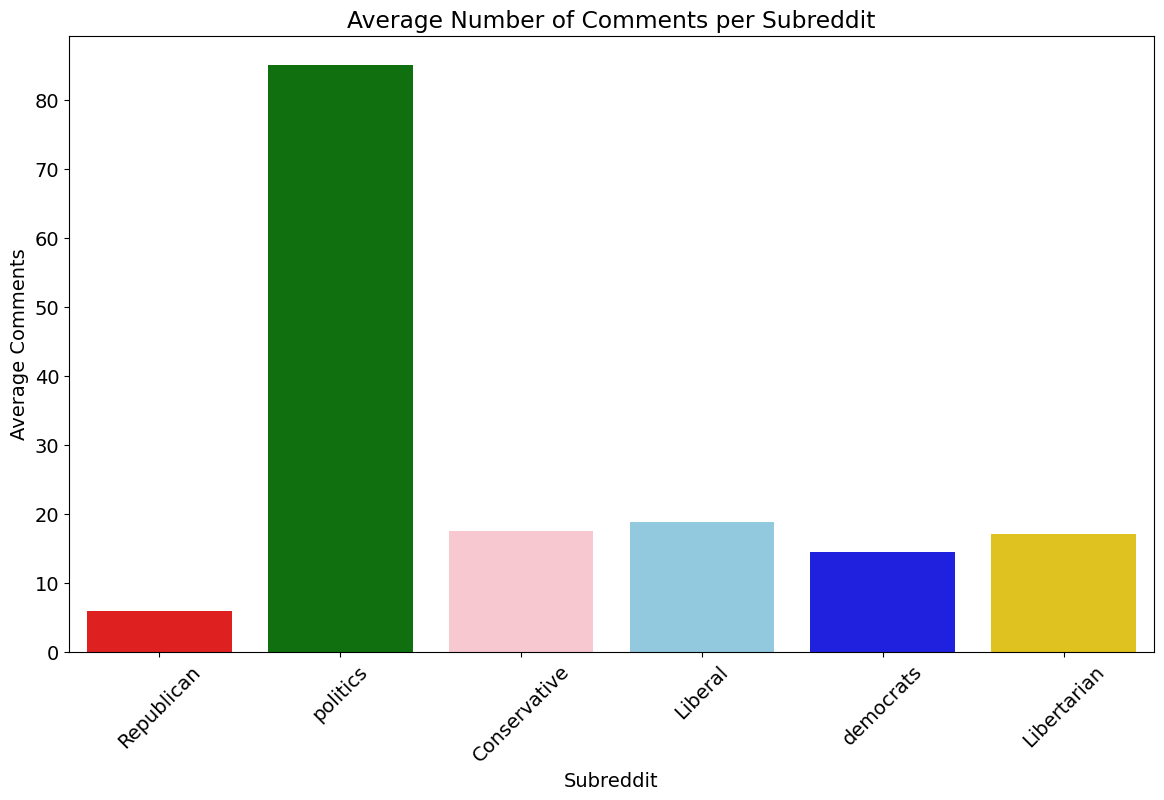

In [46]:
palette = {
    'democrats': 'blue',
    'Republican': 'red',
    'Conservative': 'pink',
    'politics' : 'green', 
    'Liberal' : 'skyblue',
    'Libertarian':'gold',
    'Biden' : (20/255,72/255,193/255),
    'Trump' : (200/255,53/255,55/255)
}


plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='subreddit', y='avg_comments', palette=palette)
plt.title("Average Number of Comments per Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Average Comments")
plt.xticks(rotation=45)

plt.savefig("../docs/plots/avg_comments.png", format="png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [47]:
trump['date'] = pd.to_datetime(trump['date'])
biden['date'] = pd.to_datetime(biden['date'])

trump_monthly_avg = trump.groupby([pd.Grouper(key='date', freq='W'), 'subreddit'])['score'].mean().reset_index()
trump_monthly_avg['Candidate'] = 'Trump'

Biden_monthly_avg = biden.groupby([pd.Grouper(key='date', freq='W'), 'subreddit'])['score'].mean().reset_index()
Biden_monthly_avg['Candidate'] = 'Biden'

monthly_avg_score = pd.concat([trump_monthly_avg, Biden_monthly_avg])
monthly_avg_score.set_index('date', inplace=True)


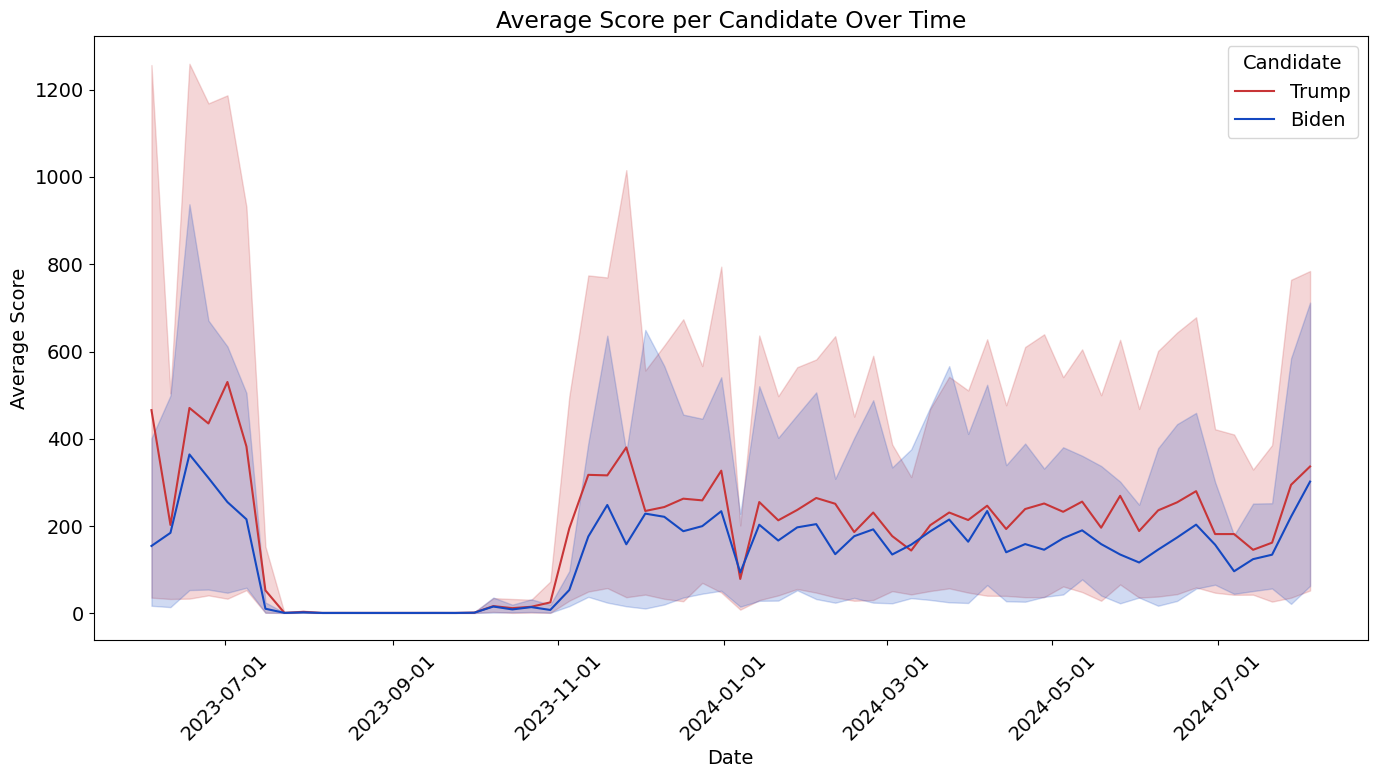

In [48]:
from matplotlib.dates import DateFormatter

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_avg_score, x='date', y='score', hue='Candidate', palette=palette)
plt.title("Average Score per Candidate Over Time")
plt.xlabel("Date")
plt.ylabel("Average Score")
plt.legend(title="Candidate")
#plt.yscale('log')
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.tight_layout()
plt.tight_layout()
plt.savefig("../docs/plots/score_over_time.png", format="png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

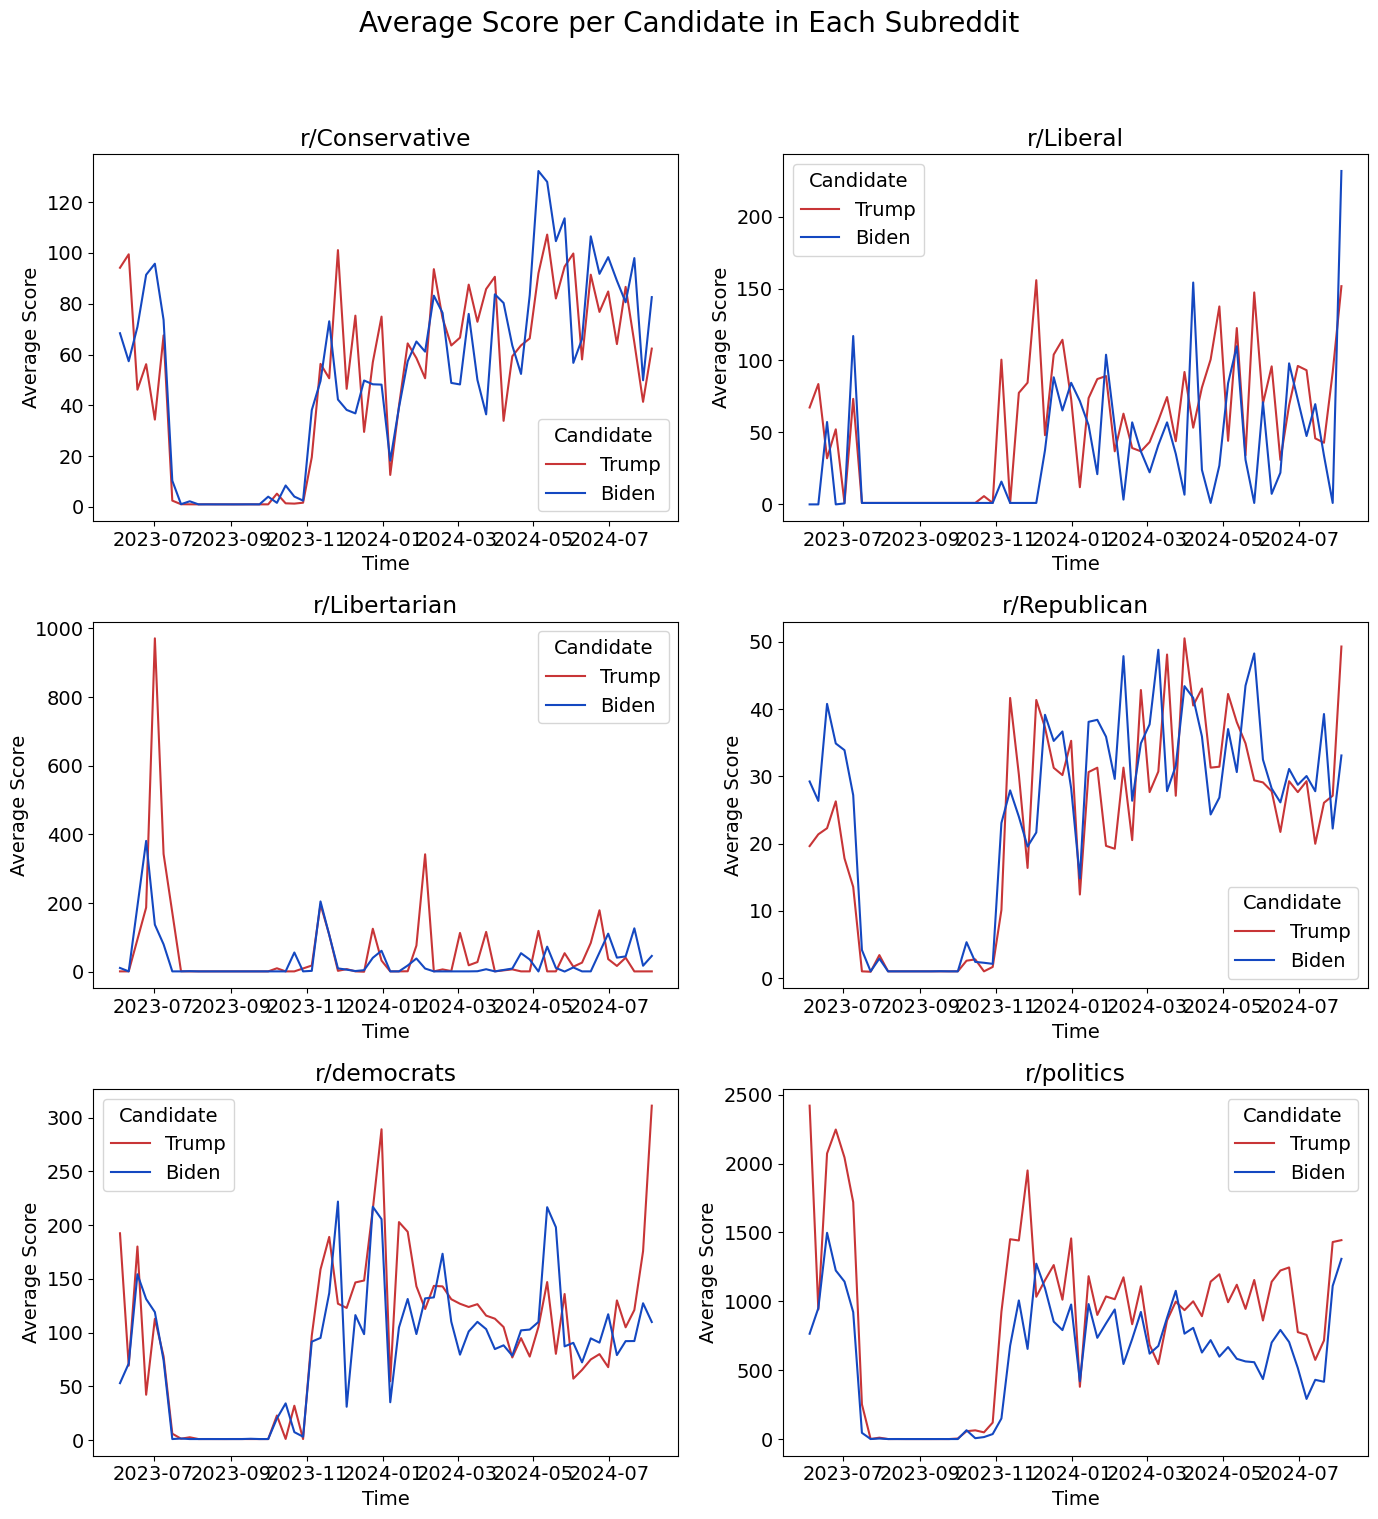

In [49]:
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
fig.suptitle('Average Score per Candidate in Each Subreddit', fontsize=20)

for (subreddit, group), ax in zip(monthly_avg_score.groupby('subreddit'), axes.flatten()):
    sns.lineplot(data=group, x='date', y='score', hue='Candidate', palette=palette, ax=ax)
    ax.set_xlabel('Time')
    ax.set_ylabel('Average Score')
    ax.set_title(f'r/{subreddit}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("score_per_subreddit.png", format="png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()


In [50]:
df['avg_score'] = df.groupby('subreddit')['score'].transform('mean')
df['date'] = pd.to_datetime(df['date'])

avg_score = df.groupby([pd.Grouper(key='date', freq='W'), 'subreddit'])['score'].mean().reset_index(name='avg_score')

df
avg_score

/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_10275/2632980478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_score'] = df.groupby('subreddit')['score'].transform('mean')
/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_10275/2632980478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,date,subreddit,avg_score
0,2023-06-04,Conservative,80.115607
1,2023-06-04,Liberal,50.500000
2,2023-06-04,Libertarian,6.000000
3,2023-06-04,Republican,24.205882
4,2023-06-04,democrats,90.071429
...,...,...,...
365,2024-08-04,Liberal,168.785714
366,2024-08-04,Libertarian,12.250000
367,2024-08-04,Republican,43.614035
368,2024-08-04,democrats,277.874126


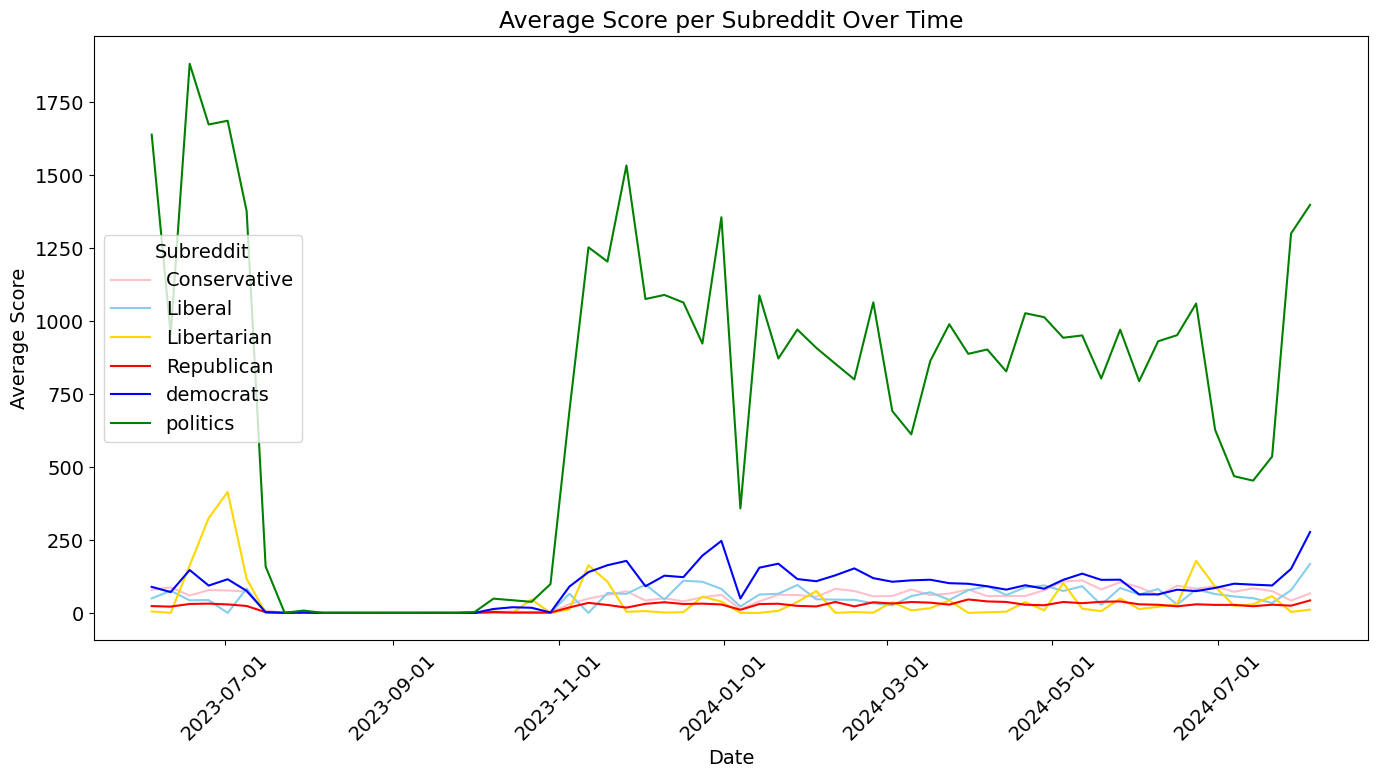

In [51]:

plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_score, x='date', y='avg_score', hue='subreddit', palette=palette)
plt.title("Average Score per Subreddit Over Time")
plt.xlabel("Date")
plt.ylabel("Average Score")
plt.legend(title="Subreddit")
#plt.yscale('log')
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../docs/plots/score_over_time.png", format="png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [52]:
df['avg_comment'] = df.groupby('subreddit')['num_comments'].transform('mean')
df['date'] = pd.to_datetime(df['date'])

avg_score = df.groupby([pd.Grouper(key='date', freq='M'), 'subreddit'])['num_comments'].mean().reset_index(name='avg_comment')

/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_10275/310895502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_comment'] = df.groupby('subreddit')['num_comments'].transform('mean')
/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_10275/310895502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_10275/310895502.py:4: FutureWarning: 'M' is deprecated and will be removed in a f

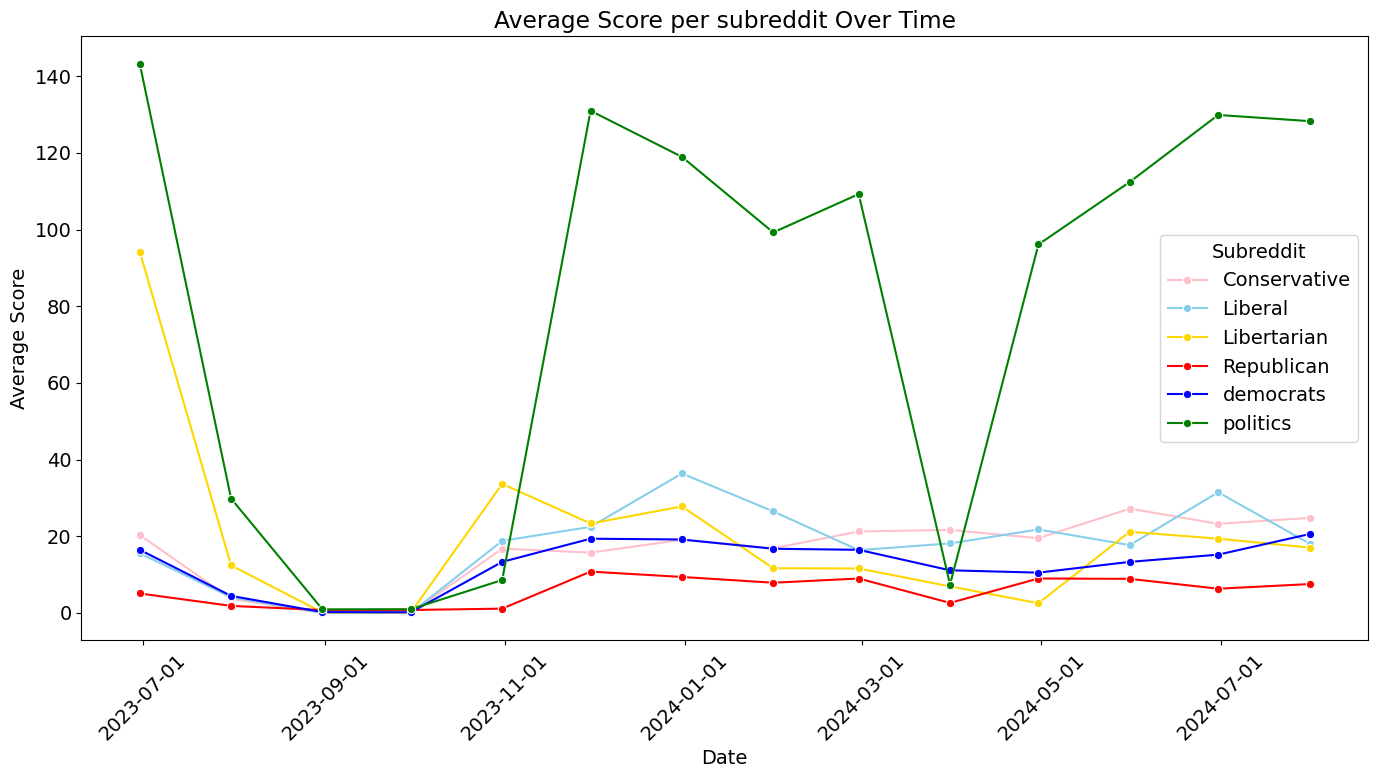

In [53]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_score, x='date', y='avg_comment', hue='subreddit', marker="o", palette=palette)
plt.title("Average Score per subreddit Over Time")
plt.xlabel("Date")
plt.ylabel("Average Score")
plt.legend(title="Subreddit")
#plt.yscale('log')
date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.tight_layout()
plt.tight_layout()
plt.savefig("../docs/plots/score_over_time.png", format="png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [54]:
pivot_table = avg_scores.pivot_table(index='subreddit', columns='Category', values='score')
pivot_table = pivot_table.round(1)
print(pivot_table)
pivot_table.to_csv("../data/tables/average_score_per_candidate_per_subreddit.csv")

Category      Biden  Trump
subreddit                 
Conservative   54.6   55.6
Liberal        40.8   57.5
Libertarian    35.3   33.2
Republican     25.3   23.3
democrats      91.6  103.2
politics      558.8  831.8


In [55]:
df

,Unnamed: 0,subreddit,author,text,num_comments,score,date,sentiment,is_biden,is_trump,id,is_hunter,is_border,is_war,is_israel,is_harris,is_indictment,avg_comments,avg_score,avg_comment
0,0,Republican,interestingfactoid,say her name conservative group launches me...,2,12,2024-06-27,positive,1,0,1dpu59h,0,1,0,0,0,0,5.938036,23.785714,5.938036
1,1,politics,Plastic-Age5205,biden expands window to try and keep millions ...,9,403,2024-03-29,negative,1,0,1bqxiww,0,0,0,0,0,0,85.078779,724.875263,85.078779
2,2,Conservative,intelligentreviews,joe biden s mental incapacity is only half the...,5,49,2024-07-08,negative,1,0,1dy7ix1,0,0,0,0,0,0,17.459072,54.247514,17.459072
3,3,Republican,yuri_2022,mccarthy goes viral for demolishing cnn report...,1,0,2023-06-13,negative,0,1,148flql,0,0,0,0,0,0,5.938036,23.785714,5.938036
5,5,Republican,intelligentreviews,nolte joe biden blamed for funding attack o...,1,1,2023-10-07,negative,1,0,172a0jf,0,0,0,1,0,0,5.938036,23.785714,5.938036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107018,107018,Liberal,Walk1000Miles,trump allies are already working against the n...,11,53,2023-10-21,negative,0,1,17d34rj,0,0,0,0,0,0,18.770872,50.164193,18.770872
107019,107019,politics,CBSnews,biden will be the democratic presidenti...,1,1,2023-09-21,positive,1,0,16onrxj,0,0,0,0,0,0,85.078779,724.875263,85.078779
107020,107020,Conservative,intelligentreviews,six colorado voters file lawsuit to ban trump ...,0,1,2023-09-07,negative,0,1,16c1yu3,0,0,0,0,0,0,17.459072,54.247514,17.459072
107021,107021,Conservative,f1sh98,hunter biden sues irs alleging agents released...,1,1,2023-09-18,negative,1,0,16luatx,1,0,0,0,0,0,17.459072,54.247514,17.459072


In [56]:
df = df[df['subreddit'].isin(['democrats', 'Conservative', 'politics', 'Republican', 'Libertarian', 'Liberal'])]
df = df[df['author'] != '[deleted]']

author_counts = df.groupby(['subreddit', 'author']).size().reset_index(name='post_count')

top_20_authors = author_counts.sort_values(['subreddit', 'post_count'], ascending=[True, False])
top_20_authors = top_20_authors.groupby('subreddit').head(10)

total_posts_per_subreddit = df['subreddit'].value_counts()

top_20_authors['percent_posts'] = top_20_authors.apply(
    lambda x: (x['post_count'] / total_posts_per_subreddit[x['subreddit']]) * 100, axis=1
)

In [57]:
top_20_authors

,subreddit,author,post_count,percent_posts
5621,Conservative,intelligentreviews,2650,9.736562
6850,Conservative,yuri_2022,1927,7.080134
385,Conservative,Ask4MD,1079,3.964434
6065,Conservative,nimobo,679,2.494764
5321,Conservative,evaldez14,593,2.178785
4513,Conservative,Vibranium2222,566,2.079583
6699,Conservative,undue-influence,476,1.748907
4995,Conservative,bshapiro24,446,1.638682
6672,Conservative,triggernaut,359,1.319029
6572,Conservative,thatrightwinger,329,1.208803


/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_10275/3271061766.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{x:.0f}%' for x in ax.get_xticks()])
/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_10275/3271061766.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{x:.0f}%' for x in ax.get_xticks()])
/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_10275/3271061766.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{x:.0f}%' for x in ax.get_xticks()])
/var/folders/4w/gxhbpkhj19j6ydpft6pz0grc0000gn/T/ipykernel_10275/3271061766.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks(

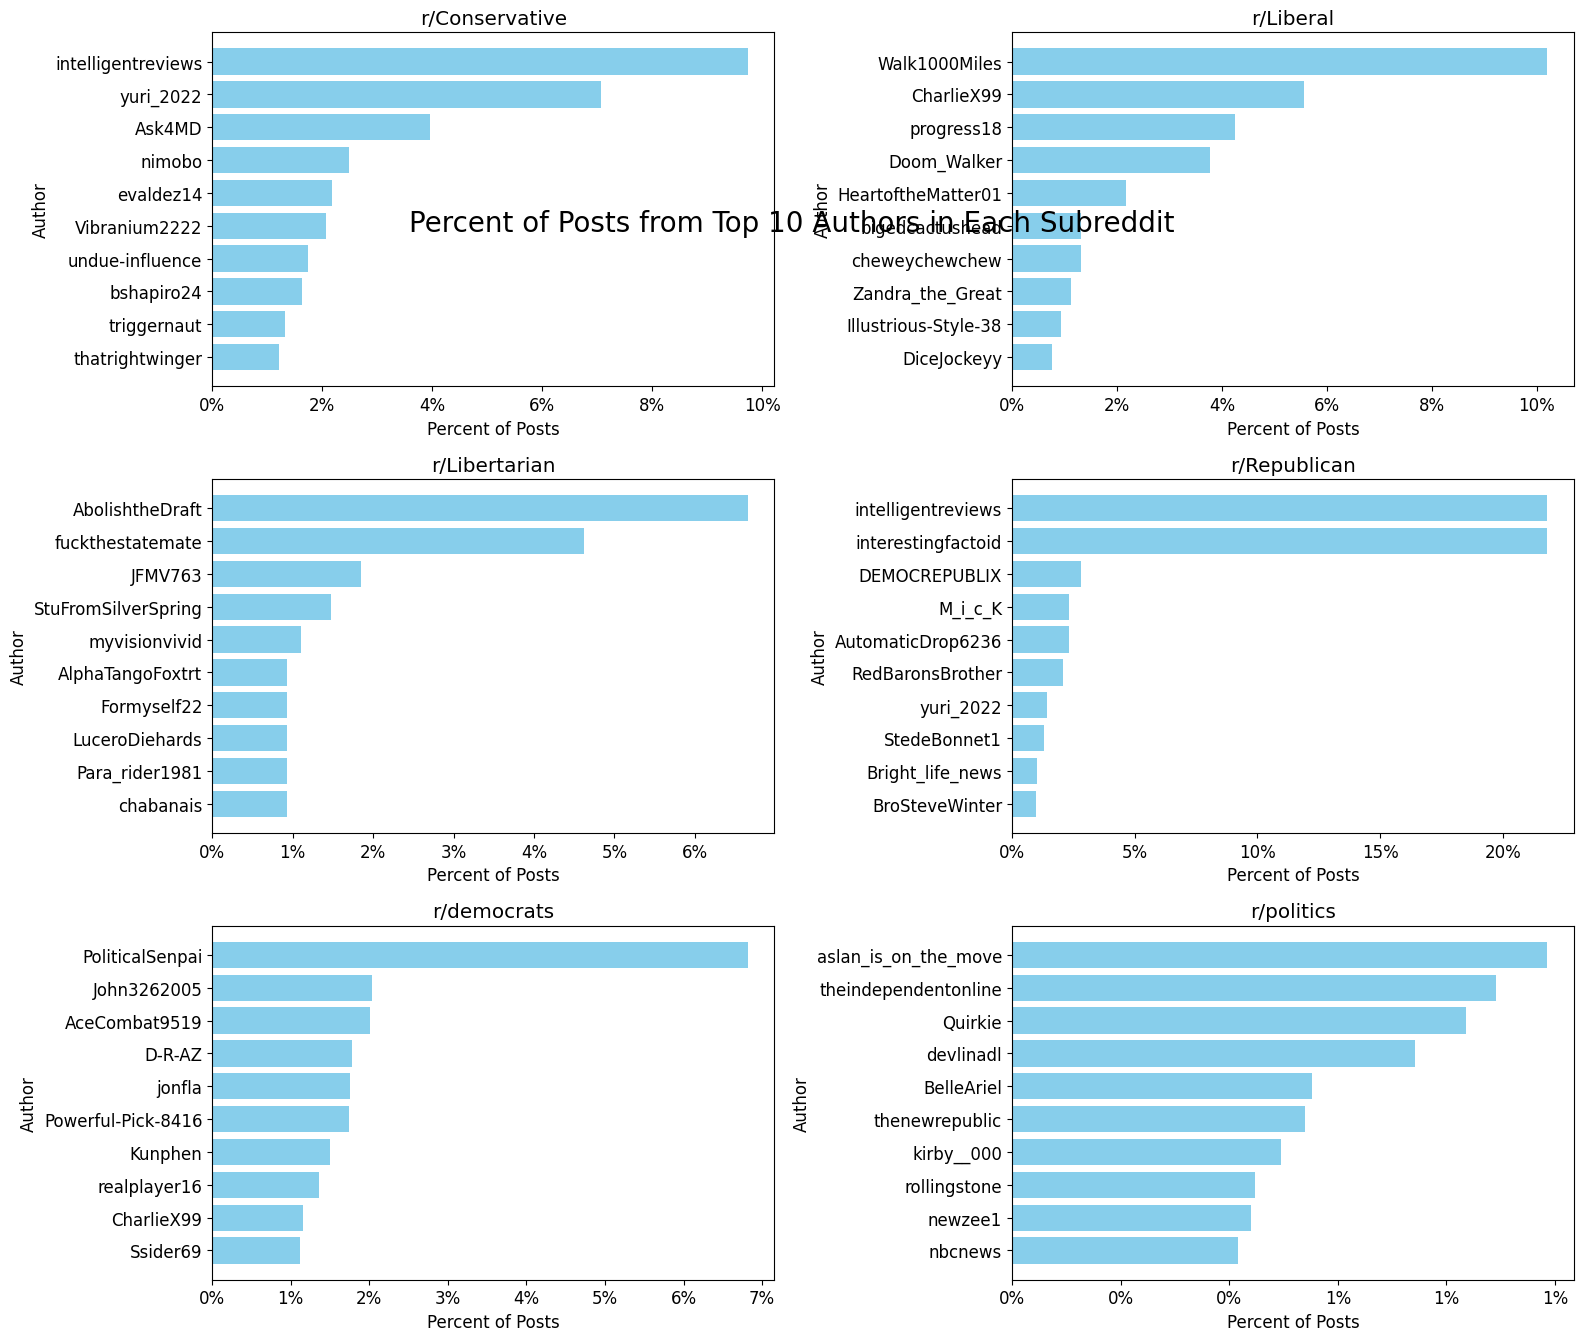

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
# Make text bigger
plt.rcParams.update({'font.size': 12})
fig.suptitle('Percent of Posts from Top 10 Authors in Each Subreddit', fontsize=20)

for (subreddit, group), ax in zip(top_20_authors.groupby('subreddit'), axes.flatten()):
    ax.barh(group['author'], group['percent_posts'], color='skyblue')
    ax.set_xlabel('Percent of Posts')
    # Make x-axis labels display percentage
    ax.set_xticklabels([f'{x:.0f}%' for x in ax.get_xticks()])
    ax.set_ylabel('Author')
    ax.set_title(f'r/{subreddit}')
    ax.invert_yaxis() 
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.savefig("percent_of_posts.png", format="png", dpi=300, transparent=True, bbox_inches="tight")
plt.show()


In [59]:
pivot_table = top_20_authors.pivot(index='subreddit', columns='author', values='percent_posts').fillna(0)
pivot_table['sum'] = pivot_table.sum(axis=1)

pivot_table = pivot_table.sort_values(by='sum', ascending=False)

pivot_table

author,AbolishtheDraft,AceCombat9519,AlphaTangoFoxtrt,Ask4MD,AutomaticDrop6236,BelleAriel,Bright_life_news,BroSteveWinter,CharlieX99,D-R-AZ,...,progress18,realplayer16,rollingstone,thatrightwinger,theindependentonline,thenewrepublic,triggernaut,undue-influence,yuri_2022,sum
subreddit,,,,,,,,,,,,,,,,,,,,,
Republican,0.000000,0.000000,0.000000,0.000000,2.315852,0.000000,1.030928,0.971164,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.434334,57.881369
Conservative,0.000000,0.000000,0.000000,3.964434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.208803,0.000000,0.000000,1.319029,1.748907,7.080134,33.449682
Liberal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.571294,0.000000,...,4.249292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.444759
democrats,0.000000,2.010882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.159215,1.774308,...,0.000000,1.360303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.268039
Libertarian,6.654344,0.000000,0.924214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.332717
politics,0.000000,0.000000,0.000000,0.000000,0.000000,0.552427,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.447288,0.000000,0.891011,0.539953,0.000000,0.000000,0.000000,6.345784
